In [1]:
import datetime as dt
from pandas_datareader import data
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

dataset_raw = data.DataReader('BTC-USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [2]:
dataset_raw1 = data.DataReader('GC=F','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,1238.300049,1235.199951,1238.300049,1235.199951,3.0,1235.199951
2014-09-17,1236.199951,1221.900024,1236.199951,1234.400024,10.0,1234.400024
2014-09-18,1225.699951,1216.199951,1216.199951,1225.699951,5.0,1225.699951
2014-09-19,1218.300049,1215.300049,1218.300049,1215.300049,4.0,1215.300049
2014-09-22,1216.800049,1212.400024,1214.900024,1216.800049,7.0,1216.800049


In [3]:
dataset_raw2 = data.DataReader('USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,14.011667,13.378333,13.378333,14.000000,31800.0,13.471940
2014-09-17,14.296667,14.045000,14.093333,14.148333,45000.0,13.614678
2014-09-18,14.458333,14.166667,14.321667,14.458333,43200.0,13.912984
2014-09-19,14.503333,14.133333,14.500000,14.213333,31200.0,13.677226
2014-09-22,14.186667,13.793333,14.186667,13.858333,37800.0,13.335614


In [4]:
dataset_raw22 = dataset_raw2 [["Close"]] 
dataset_raw22.head()

,Close
Date,
2014-09-16,14.000000
2014-09-17,14.148333
2014-09-18,14.458333
2014-09-19,14.213333
2014-09-22,13.858333


In [5]:
dataset_raw3 = data.DataReader('ETH-USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0,1.067860


In [6]:
dataset_raw33 = dataset_raw3 [["Close"]] 
dataset_raw33.head()

,Close
Date,
2015-08-06,2.772120
2015-08-07,0.753325
2015-08-08,0.701897
2015-08-09,0.708448
2015-08-10,1.067860


In [7]:
dataset_raw4 = data.DataReader('GOOGL','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,590.150024,580.950012,580.950012,588.780029,1579600,588.780029
2014-09-17,596.070007,587.119995,589.510010,593.289978,1719500,593.289978
2014-09-18,597.559998,593.020020,595.049988,597.270020,1494500,597.270020
2014-09-19,605.400024,597.760010,599.489990,605.400024,4191600,605.400024
2014-09-22,603.799988,593.119995,602.500000,597.270020,1782200,597.270020


In [8]:
dataset_raw44 = dataset_raw4 [["Close"]] 
dataset_raw44.head()

,Close
Date,
2014-09-16,588.780029
2014-09-17,593.289978
2014-09-18,597.270020
2014-09-19,605.400024
2014-09-22,597.270020


In [9]:
dfm2= pd.merge(dataset_raw22,dataset_raw33, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm2.head()

,Close_x,Close_y
Date,,
2014-09-16,14.000000,NaN
2014-09-17,14.148333,NaN
2014-09-18,14.458333,NaN
2014-09-19,14.213333,NaN
2014-09-22,13.858333,NaN


In [11]:
dfm3= pd.merge(dfm2,dataset_raw44, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm3.head()

,Close_x,Close_y,Close
Date,,,
2014-09-16,14.000000,NaN,588.780029
2014-09-17,14.148333,NaN,593.289978
2014-09-18,14.458333,NaN,597.270020
2014-09-19,14.213333,NaN,605.400024
2014-09-22,13.858333,NaN,597.270020


In [12]:
dfm3.columns = ['Close_usd', "Close_eth","Close_googl"]
dfm3.head()

,Close_usd,Close_eth,Close_googl
Date,,,
2014-09-16,14.000000,NaN,588.780029
2014-09-17,14.148333,NaN,593.289978
2014-09-18,14.458333,NaN,597.270020
2014-09-19,14.213333,NaN,605.400024
2014-09-22,13.858333,NaN,597.270020


In [ ]:
dataset_raw1.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [13]:
dfm= pd.merge(dataset_raw,dataset_raw1, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,1238.300049,1235.199951,1238.300049,1235.199951,3.0,1235.199951
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,1236.199951,1221.900024,1236.199951,1234.400024,10.0,1234.400024
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,1225.699951,1216.199951,1216.199951,1225.699951,5.0,1225.699951
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,1218.300049,1215.300049,1218.300049,1215.300049,4.0,1215.300049
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Esto completa columnas NAN con el valor previo
dfm1 = dfm.fillna(method='pad')

In [15]:
dfm1.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,1238.300049,1235.199951,1238.300049,1235.199951,3.0,1235.199951
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,1236.199951,1221.900024,1236.199951,1234.400024,10.0,1234.400024
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,1225.699951,1216.199951,1216.199951,1225.699951,5.0,1225.699951
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,1218.300049,1215.300049,1218.300049,1215.300049,4.0,1215.300049
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,1218.300049,1215.300049,1218.300049,1215.300049,4.0,1215.300049


In [16]:
dataframe = dfm1[['Close_x', "Close_y","Adj Close_x"]]
dataframe.head()

,Close_x,Close_y,Adj Close_x
Date,,,
2014-09-16,457.334015,1235.199951,457.334015
2014-09-17,424.440002,1234.400024,424.440002
2014-09-18,394.795990,1225.699951,394.795990
2014-09-19,408.903992,1215.300049,408.903992
2014-09-20,398.821014,1215.300049,398.821014


In [17]:
dataframe.columns = ['Close_btc', "Close_gld","Close_target"]

In [18]:
dataframe1= pd.merge(dataframe,dfm3, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dataframe1.head()

,Close_btc,Close_gld,Close_target,Close_usd,Close_eth,Close_googl
Date,,,,,,
2014-09-16,457.334015,1235.199951,457.334015,14.000000,NaN,588.780029
2014-09-17,424.440002,1234.400024,424.440002,14.148333,NaN,593.289978
2014-09-18,394.795990,1225.699951,394.795990,14.458333,NaN,597.270020
2014-09-19,408.903992,1215.300049,408.903992,14.213333,NaN,605.400024
2014-09-20,398.821014,1215.300049,398.821014,NaN,NaN,NaN


In [19]:
dataframe = dataframe1[['Close_btc', "Close_gld", "Close_usd", "Close_eth", "Close_googl", "Close_target"]]
#dataframe1.columns = ['Close_btc', "Close_gld","Close_target", "Close_usd", "Close_oil", "Close_googl"]

In [20]:
dataframe.head()

,Close_btc,Close_gld,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1235.199951,14.000000,NaN,588.780029,457.334015
2014-09-17,424.440002,1234.400024,14.148333,NaN,593.289978,424.440002
2014-09-18,394.795990,1225.699951,14.458333,NaN,597.270020,394.795990
2014-09-19,408.903992,1215.300049,14.213333,NaN,605.400024,408.903992
2014-09-20,398.821014,1215.300049,NaN,NaN,NaN,398.821014


In [23]:
# Esto completa columnas NAN con el valor previo
dataframe = dataframe.fillna(method='pad')

In [24]:
dataframe.head()

,Close_btc,Close_gld,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1235.199951,14.000000,NaN,588.780029,457.334015
2014-09-17,424.440002,1234.400024,14.148333,NaN,593.289978,424.440002
2014-09-18,394.795990,1225.699951,14.458333,NaN,597.270020,394.795990
2014-09-19,408.903992,1215.300049,14.213333,NaN,605.400024,408.903992
2014-09-20,398.821014,1215.300049,14.213333,NaN,605.400024,398.821014


In [25]:
# Esto completa columnas NAN con el valor posterior
dataframe = dataframe.fillna(method='bfill')

In [26]:
dataframe.head()

,Close_btc,Close_gld,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1235.199951,14.000000,2.77212,588.780029,457.334015
2014-09-17,424.440002,1234.400024,14.148333,2.77212,593.289978,424.440002
2014-09-18,394.795990,1225.699951,14.458333,2.77212,597.270020,394.795990
2014-09-19,408.903992,1215.300049,14.213333,2.77212,605.400024,408.903992
2014-09-20,398.821014,1215.300049,14.213333,2.77212,605.400024,398.821014


In [27]:
#dataframe.values[0, :-1]
dataframe.values[0 , :-1]

array([ 457.33401489, 1235.19995117,   14.        ,    2.77212   ,
        588.7800293 ])

In [28]:
dataframe.values[4, -1]
#dataframe.values[0 , :-1]

398.8210144042969

In [29]:
numpy.append(dataframe.values[0 , :-1], dataframe.values[4, -1])
#numpy.append(dataset_raw.values[0, :-1], dataset_raw.values[1, -1])

array([ 457.33401489, 1235.19995117,   14.        ,    2.77212   ,
        588.7800293 ,  398.8210144 ])

In [30]:
len(dataframe)

2429

In [70]:

def create_dataset(dataset):
    data = []
    for i in range(len(dataset)-30):
        data.append(numpy.append(dataframe.values[i, :-1], dataframe.values[i+30, -1]))
    return numpy.array(data)

data = create_dataset(dataframe.values)
print(data[:10])
print(data.shape)

[[ 457.33401489 1235.19995117   14.            2.77212     588.7800293
   383.75799561]
 [ 424.44000244 1234.40002441   14.1483326     2.77212     593.28997803
   391.44198608]
 [ 394.79598999 1225.69995117   14.45833302    2.77212     597.27001953
   389.54598999]
 [ 408.9039917  1215.30004883   14.21333313    2.77212     605.40002441
   382.84500122]
 [ 398.8210144  1215.30004883   14.21333313    2.77212     605.40002441
   386.4750061 ]
 [ 402.15200806 1215.30004883   14.21333313    2.77212     605.40002441
   383.1579895 ]
 [ 435.79098511 1216.80004883   13.85833263    2.77212     597.27001953
   358.41699219]
 [ 423.20498657 1221.           13.78833294    2.77212     591.17999268
   358.34500122]
 [ 411.57400513 1218.59997559   14.05000019    2.77212     598.41998291
   347.27099609]
 [ 404.42498779 1221.19995117   13.57166672    2.77212     585.25
   354.70401001]]
(2399, 6)


In [72]:
# forecast Bitcoin price
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import numpy
from tqdm import tqdm

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX, n_estimators):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0], model

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, n_estimators=10):
    predictions = list()
    models = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in tqdm(range(len(test))):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat, model = xgboost_forecast(history, testX, n_estimators)
        # store forecast in list of predictions
        predictions.append(yhat)
        models.append(model)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        # print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = math.sqrt(mean_absolute_error(test[:, -1], predictions))
    return error, test[:, -1], predictions, models

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
100%|██████████| 2000/2000 [01:27<00:00, 22.86it/s]


28.22 RMSE


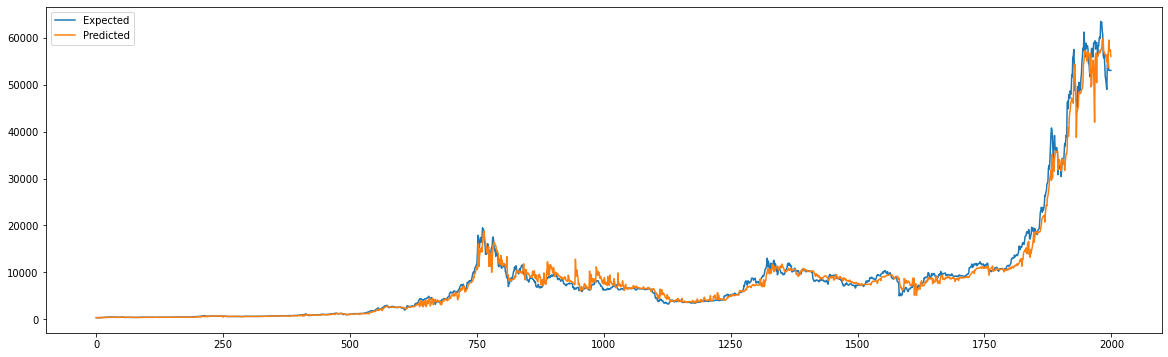

In [73]:
# evaluate
#n_future = 4
mae, y, yhat, models = walk_forward_validation(data, n_test=2000, n_estimators=50)
print("%.2f RMSE" % mae)
# plot expected vs preducted

plt.figure(figsize=(20, 6))
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [74]:
y

array([  322.02200317,   326.92700195,   324.53601074, ...,
       53065.67578125, 53065.67578125, 53065.67578125])

In [75]:
yhat[-1]

56046.605

KeyboardInterrupt: ignored

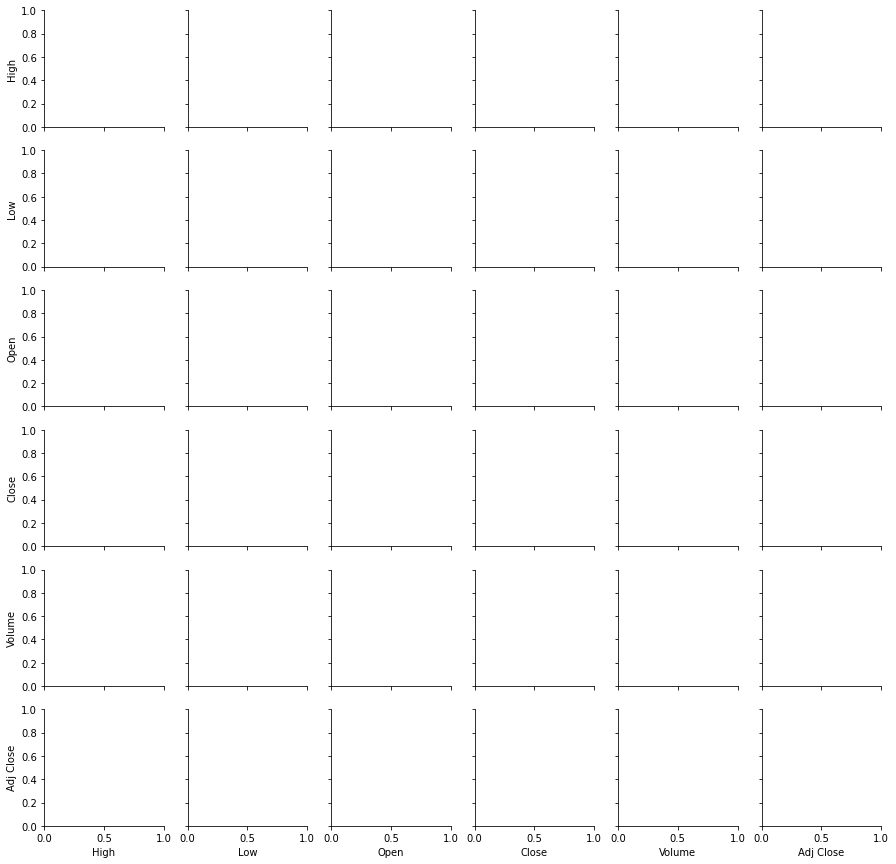

In [ ]:
import seaborn as sns
sns.pairplot(dataset_raw)

In [76]:
cols = dataframe.columns[:-1]
imps = numpy.stack([m.feature_importances_ for m in models])

In [77]:
imps.shape

(2000, 5)

In [79]:
feature_importances = DataFrame(imps, columns=cols)
# feature_importances = feature_importances.sort_values(by='imp',ascending=False)
# px.bar(feature_importances,x='col',y='imp')
feature_importances.describe()

,Close_btc,Close_gld,Close_usd,Close_eth,Close_googl
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.315625,0.046167,0.340666,0.135939,0.161603
std,0.232216,0.028020,0.280188,0.207165,0.170522
min,0.023211,0.003149,0.015261,0.010061,0.015948
25%,0.097042,0.017453,0.079034,0.025237,0.074751
50%,0.301067,0.051480,0.288240,0.043976,0.092876
75%,0.456536,0.068560,0.581657,0.127398,0.143826
max,0.793363,0.119468,0.840169,0.824784,0.814664


In [ ]:
#Las variables High, Low, Close y Open tienen una importancia muy similar. Viendo las correlaciones, esto nos indica que son redundantes. Por otra parte, Volume no aporta nada.

#¿Y si hubiéramos normalizado?

In [ ]:
#def create_dataset(dataset):
    #data = []
   # for i in range(len(dataset)-1):
  #      data.append(numpy.append(dataset_raw.values[i, :-1], dataset_raw.values[i+1, -1]))
 #   return numpy.array(data)

#data = create_dataset(dataset_raw.values)
#print(data[:5])
#print(data.shape)

[[4.68174011e+02 4.52421997e+02 4.65864014e+02 4.57334015e+02
  2.10568000e+07 4.24440002e+02]
 [4.56859985e+02 4.13104004e+02 4.56859985e+02 4.24440002e+02
  3.44832000e+07 3.94795990e+02]
 [4.27834991e+02 3.84532013e+02 4.24102997e+02 3.94795990e+02
  3.79197000e+07 4.08903992e+02]
 [4.23295990e+02 3.89882996e+02 3.94673004e+02 4.08903992e+02
  3.68636000e+07 3.98821014e+02]
 [4.12425995e+02 3.93181000e+02 4.08084991e+02 3.98821014e+02
  2.65801000e+07 4.02152008e+02]]
(2406, 6)


In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
scaler = StandardScaler()
scaler = scaler.fit(data)
data = scaler.transform(data)

In [42]:
data

array([[-0.61463872, -0.56170624, -0.92316421, -0.64604596, -1.21509884,
        -0.61911738],
       [-0.61768793, -0.56520084, -0.91764387, -0.64604596, -1.2031572 ,
        -0.61881303],
       [-0.62043587, -0.6032084 , -0.90610691, -0.64604596, -1.19261868,
        -0.61573942],
       ...,
       [ 4.44442336,  1.81483844,  3.36448663,  5.8280833 ,  3.34223582,
         4.1930767 ],
       [ 4.42510381,  1.80959628,  3.30977884,  6.03134168,  3.29205933,
         4.1930767 ],
       [ 4.26204562,  1.76678331,  3.13598039,  6.00424785,  3.53216555,
         4.1930767 ]])

In [42]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data[:5]

array([[0.00440947, 0.18427092, 0.03497119, 1.        , 0.04857486,
        0.00348546],
       [0.00389002, 0.18347155, 0.03615823, 0.99652857, 0.05096333,
        0.00353806],
       [0.0034219 , 0.17477757, 0.03863903, 0.98634067, 0.05307116,
        0.00406927],
       [0.00364469, 0.16438494, 0.0366784 , 0.98135995, 0.0573768 ,
        0.00387052],
       [0.00348546, 0.16438494, 0.0366784 , 0.98135995, 0.0573768 ,
        0.00368685]])

In [ ]:
data.min(axis=0)

array([0., 0., 0., 0., 0., 0.])

In [ ]:
data.max(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [43]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
import numpy
from tqdm import tqdm

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX, n_estimators):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0], model

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, n_estimators=10):
    predictions = list()
    models = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in tqdm(range(len(test))):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat, model = xgboost_forecast(history, testX, n_estimators)
        # store forecast in list of predictions
        predictions.append(yhat)
        models.append(model)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        # print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = math.sqrt(mean_absolute_error(test[:, -1], predictions))
    return error, test[:, -1], predictions, models

  0%|          | 0/1760 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
100%|██████████| 1760/1760 [01:17<00:00, 22.71it/s]


0.05 RMSE


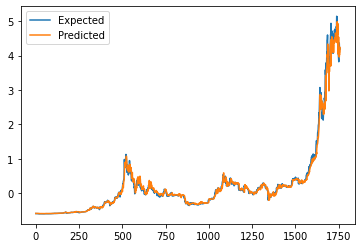

In [44]:
# evaluate
mae, y, yhat, models = walk_forward_validation(data, n_test=1760, n_estimators=50)
print('%.2f RMSE' % mae)

# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [61]:
len(y)


1760

In [63]:
yorig= scaler.inverse_transform(y ,6)

ValueError: ignored

In [ ]:
y_orig1 = scaler.inverse_transform(y_orig)


KeyError: ignored

In [ ]:
yhat[-1]

0.8177413

In [67]:
cols = dataframe.columns[:-1]
imps = numpy.stack([m.feature_importances_ for m in models])

In [68]:
feature_importances = DataFrame(imps, columns=cols)
feature_importances.describe()

,Close_btc,Close_gld,Close_usd,Close_eth,Close_googl
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.637916,0.026268,0.181494,0.048357,0.105964
std,0.276710,0.020835,0.220548,0.088049,0.102025
min,0.079653,0.000000,0.000000,0.002331,0.005699
25%,0.479236,0.006548,0.017129,0.008127,0.040887
50%,0.747575,0.020443,0.074657,0.019149,0.062230
75%,0.859160,0.042632,0.260081,0.044862,0.134450
max,0.944265,0.083655,0.766441,0.589489,0.618652
